In [88]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import pandas as pd

In [89]:

# Carregar dataset
X, y = fetch_openml(name="diabetes", version=1, return_X_y=True)
y = LabelEncoder().fit_transform(y)

# Dividir em treino e teste
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.33, random_state=42)

# Normalizar os dados
NormalizarDados = StandardScaler()
Xtr = NormalizarDados.fit_transform(Xtr)
Xte = NormalizarDados.transform(Xte)

# Codificar rótulos em categorias
ytr_cat = to_categorical(ytr, num_classes=2)
yte_cat = to_categorical(yte, num_classes=2)

# Definir arquitetura da rede neural
input_layer = layers.Input(shape=(Xtr.shape[1],))

# Você pode ajustar aqui quantos neurônios quiser em cada camada oculta
hidden1 = layers.Dense(16, activation='relu')(input_layer)
hidden2 = layers.Dense(32, activation='relu')(hidden1)
hidden3 = layers.Dense(8, activation='relu')(hidden2)

# Camada de saída — sigmoid para classificação binária
output_layer = layers.Dense(1, activation='sigmoid')(hidden3)

# Criar o modelo
nn = models.Model(inputs=input_layer, outputs=output_layer)
nn.summary()

# Compilar e treinar
nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = nn.fit(Xtr, ytr, epochs=150, verbose=True, validation_data=(Xte, yte))

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.3813 - loss: 0.7612 - val_accuracy: 0.4449 - val_loss: 0.7254
Epoch 2/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5486 - loss: 0.6837 - val_accuracy: 0.6220 - val_loss: 0.6813
Epoch 3/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6848 - loss: 0.6500 - val_accuracy: 0.6732 - val_loss: 0.6558
Epoch 4/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7335 - loss: 0.6202 - val_accuracy: 0.6654 - val_loss: 0.6375
Epoch 5/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7510 - loss: 0.5885 - val_accuracy: 0.6732 - val_loss: 0.6132
Epoch 6/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7665 - loss: 0.5562 - val_accuracy: 0.7087 - val_loss: 0.5873
Epoch 7/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7802 - loss: 0.5259 - val_accuracy: 0.7126 - val_loss: 0.5672
Epoch 8/150
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7821 - loss: 0.4996 - val_accuracy: 0.7402 - 

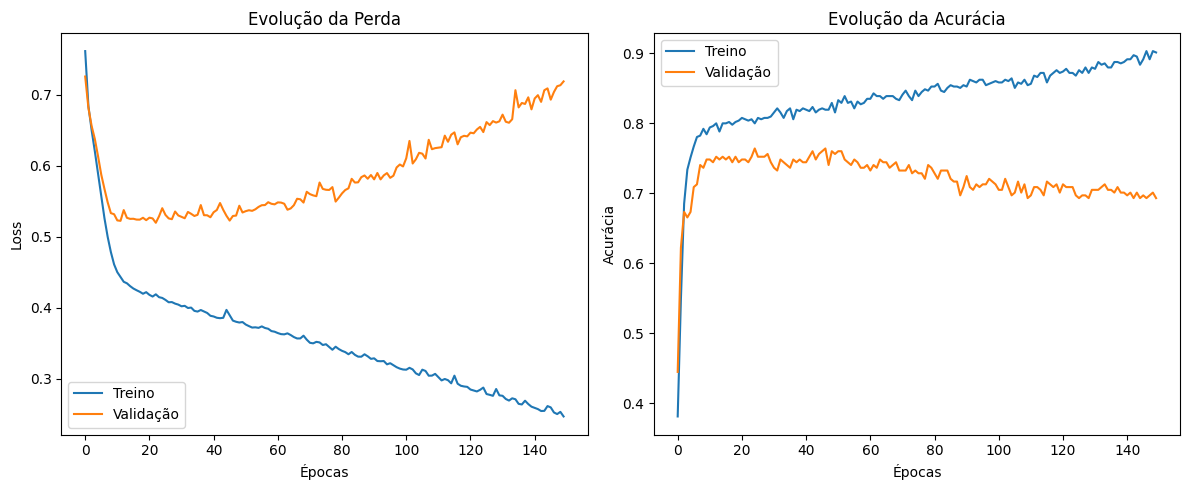

In [90]:
# === PLOTAR GRÁFICOS ===
plt.figure(figsize=(12,5))

# Gráfico da perda (loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treino')
plt.plot(history.history['val_loss'], label='Validação')
plt.title('Evolução da Perda')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend()

# Gráfico da acurácia
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.title('Evolução da Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()

plt.tight_layout()
plt.show()

In [91]:
X, y = fetch_openml(name="diabetes", version=1, return_X_y=True)
y = LabelEncoder().fit_transform(y)


In [92]:
X.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


(768, 8) (768,)
Epoch 1/50


c:\Users\estev\OneDrive\Área de Trabalho\NCIA\.ncia\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5906 - loss: 1.0032 - val_accuracy: 0.6829 - val_loss: 0.9801
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6558 - loss: 0.9632 - val_accuracy: 0.6829 - val_loss: 0.9430
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7251 - loss: 0.9055 - val_accuracy: 0.6748 - val_loss: 0.9064
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7149 - loss: 0.8811 - val_accuracy: 0.6748 - val_loss: 0.8749
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7271 - loss: 0.8472 - val_accuracy: 0.6667 - val_loss: 0.8460
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7149 - loss: 0.8204 - val_accuracy: 0.6748 - val_loss: 0.8173
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7169 - loss: 0.7959 - val_accuracy: 0.6748 - val_loss: 0.7913
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7210 - loss: 0.7672 - val_accuracy: 0.6911 - val_loss: 0.7667
Ep

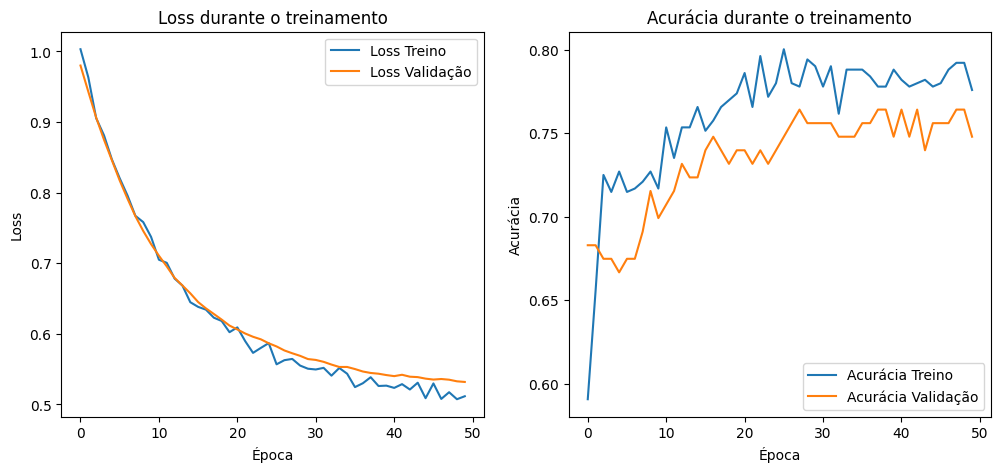

In [93]:
# Código completo com regularização e Dropout (versão aprimorada / evitando overfitting)
# 1️⃣ Carregar dados
X, y = fetch_openml(name="diabetes", version=1, return_X_y=True)
y = LabelEncoder().fit_transform(y)

print(X.shape, y.shape)

# 2️⃣ Normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3️⃣ Dividir em treino e teste
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# 4️⃣ Criar o modelo com regularização e Dropout
model = Sequential([
    Dense(32, activation='relu', kernel_regularizer=l2(0.01), input_shape=(Xtr.shape[1],)),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 5️⃣ Early stopping para evitar overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# 6️⃣ Treinar o modelo
history = model.fit(Xtr, ytr,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stop],
                    verbose=1)

# 7️⃣ Plotar histórico de treino
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Loss Treino')
plt.plot(history.history['val_loss'], label='Loss Validação')
plt.title('Loss durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Acurácia Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia durante o treinamento')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()

plt.show()

Text(0.5, 1.0, 'Test')

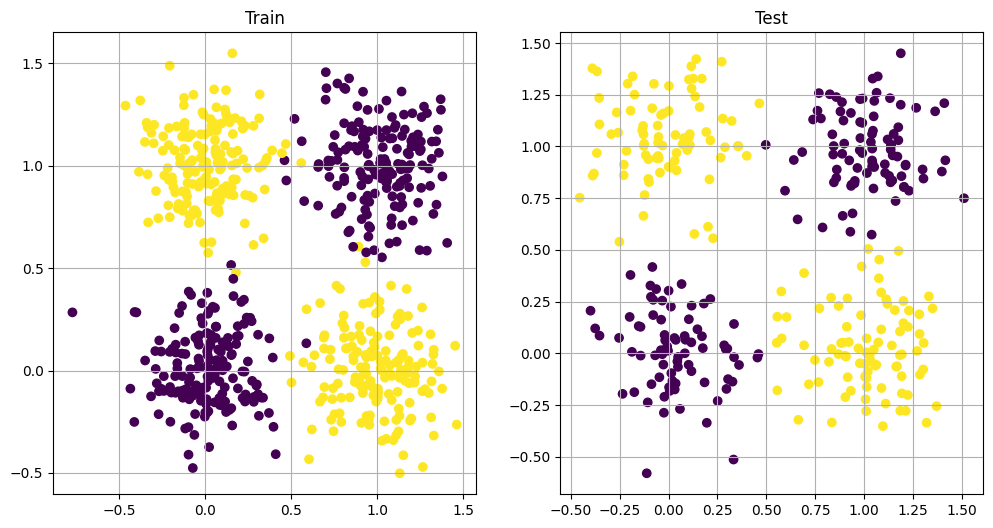

In [94]:
#=== Gerar dados de exemplo para visualização ===

Npts = 250
Centers = np.array([[0,0],[1,1],[1,0],[0,1]])
spread = 0.2

X = np.vstack([spread*np.random.randn(Npts,2)+center for center in Centers])
y = np.hstack([np.zeros(2*Npts,dtype=int),np.ones(2*Npts,dtype=int)])


Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.33, random_state=42)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(Xtr[:,0],Xtr[:,1],c=ytr)
plt.grid(True)
plt.title("Train")

plt.subplot(1,2,2)
plt.scatter(Xte[:,0],Xte[:,1],c=yte)
plt.grid(True)
plt.title("Test")